# Testing plotnine on Chapter 5 of Healy's Data Visualization
[link](https://socviz.co/workgeoms.html) to chapter

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine

%matplotlib inline

In [2]:
gss_sm = pd.read_feather('data/gss_sm.f')
gss_sm['religion'] = gss_sm['religion'].cat.add_categories(['NA'])
gss_sm['religion'] = gss_sm['religion'].fillna('NA')
# TODO(jkg): how to improve this?
gss_sm['cnt'] = 1
rel_by_region = gss_sm.groupby(['bigregion','religion'])['cnt'].count().reset_index()
rel_by_region['freq'] = rel_by_region.groupby('bigregion')['cnt'].apply(lambda x: x/sum(x))
rel_by_region['pct'] = rel_by_region['freq'].apply(lambda x: round(x*100),1) # this can't be 0 for some unknown reason!

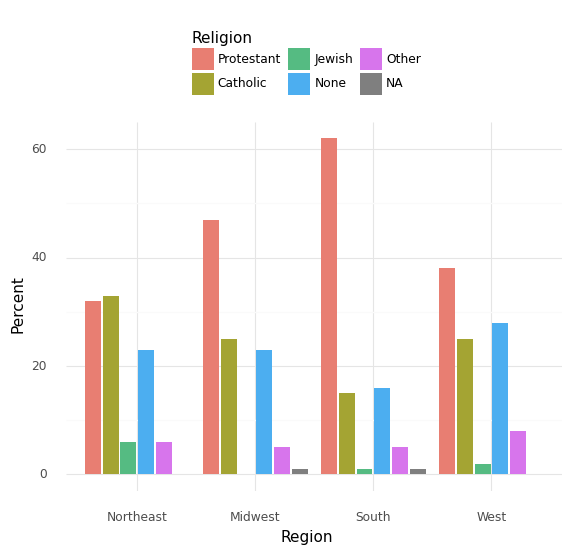

<ggplot: (321839740)>

In [3]:
# 5.2

GGRED   = '#e87e72'
GGGREENISH = '#a4a433' 
GGGREEN = '#55bb82'
GGTEAL = '#4caef0'
GGLIGHTPURPLE = '#d775ec'
GGGRAY = '#7f7f7f'


p = ggplot(rel_by_region, aes(x='bigregion',y='pct',fill='religion'))
p + geom_col(position="dodge2") + scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    ) + labs(x='Region',y='Percent',fill='Religion') + \
    theme_minimal() + theme(legend_position='top')

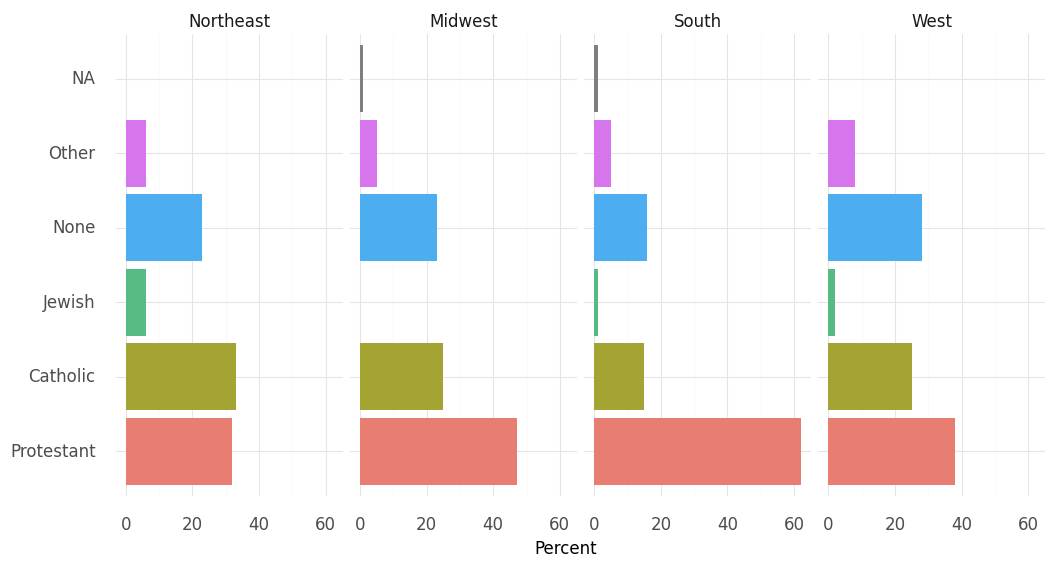

<ggplot: (326371422)>

In [4]:
# 5.3
plotnine.options.figure_size = (12, 6)


p = ggplot(rel_by_region, aes(x='religion',y='pct',fill='religion'))
p + geom_col(position='dodge2') + \
    labs(x=None, y='Percent', fill='Religion') + \
    guides(fill=False) + \
    coord_flip() + \
    facet_grid('~ bigregion') + \
    theme_minimal() + \
    scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    ) + \
    theme(text=element_text(size= 12))

## Continuous Variables by Group or Category

In [5]:
organdata = pd.read_feather('data/organdata.f')
organdata = organdata[organdata['year'].notnull()]
organdata['year'] = pd.to_datetime(organdata['year']).apply(lambda x: x.year).astype(int)

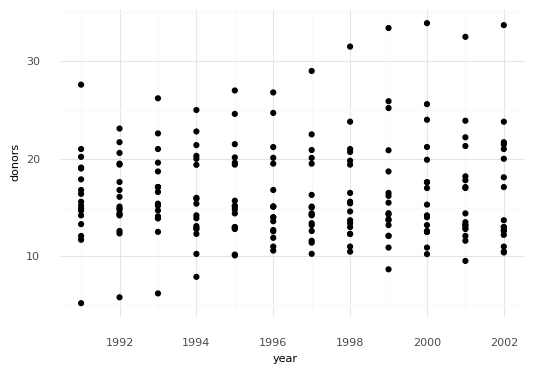

<ggplot: (326813266)>

In [6]:
# 5.4

plotnine.options.figure_size = (6, 4)
p = ggplot(
    data=organdata,
    mapping=aes(x='year',y='donors')
)

p + geom_point() + theme_minimal() + \
    theme(text=element_text(size=8)) + \
    scale_x_continuous(breaks=[1992,1994,1996,1998,2000,2002])

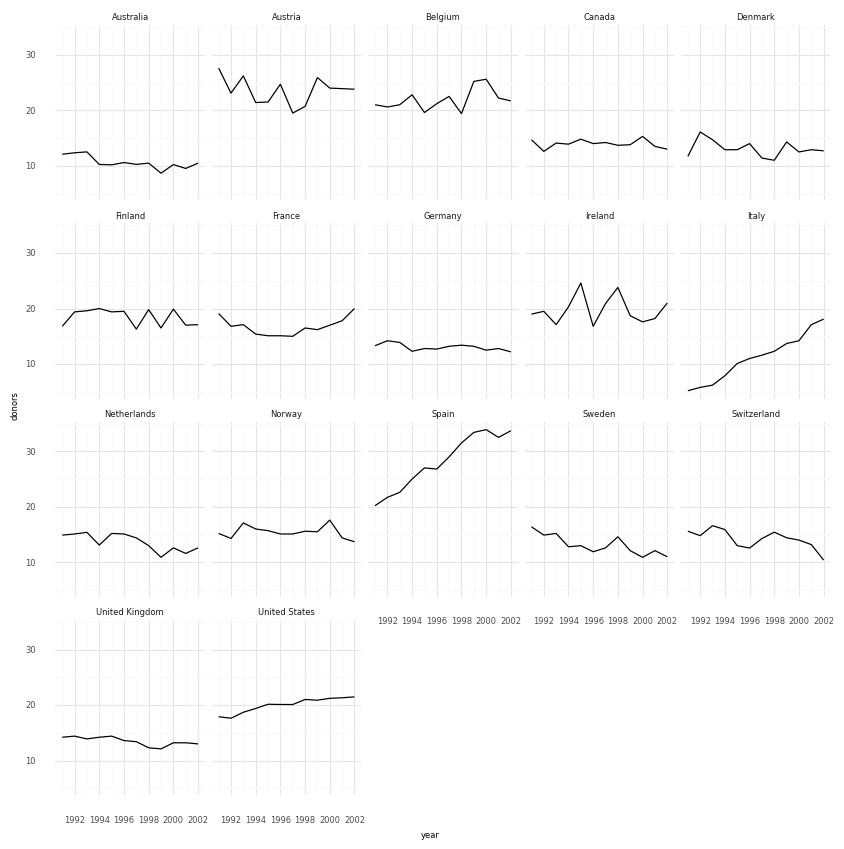

<ggplot: (321839650)>

In [7]:
# 5.5

plotnine.options.figure_size = (10, 10)

p = ggplot(
    data=organdata,
    mapping=aes(x='year',y='donors')
)

p + geom_line(aes(group='country')) + \
    facet_wrap('~country') + \
    theme_minimal() + \
    scale_x_continuous(breaks=[1992,1994,1996,1998,2000,2002]) + \
    theme(text=element_text(size= 6))

## Boxplots

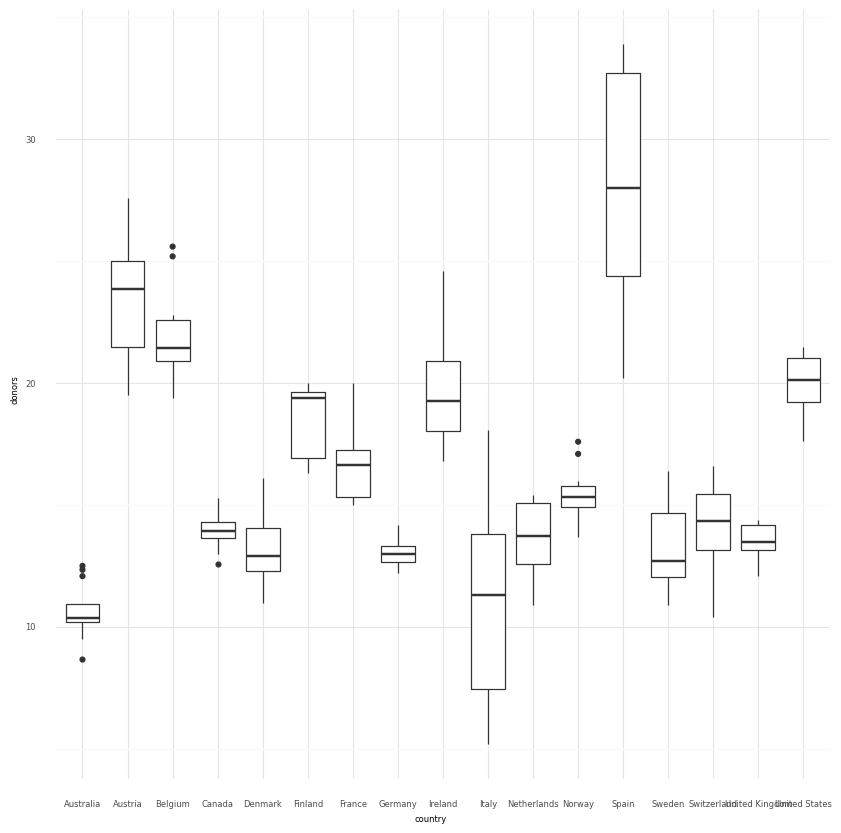

<ggplot: (326824452)>

In [8]:
# 5.6

plotnine.options.figure_size = (10, 10)

p = ggplot(
    data = organdata,
    mapping = aes(x='country', y='donors')
)

p1 = p + geom_boxplot() + theme_minimal() + \
    theme(text=element_text(size= 6))

p1

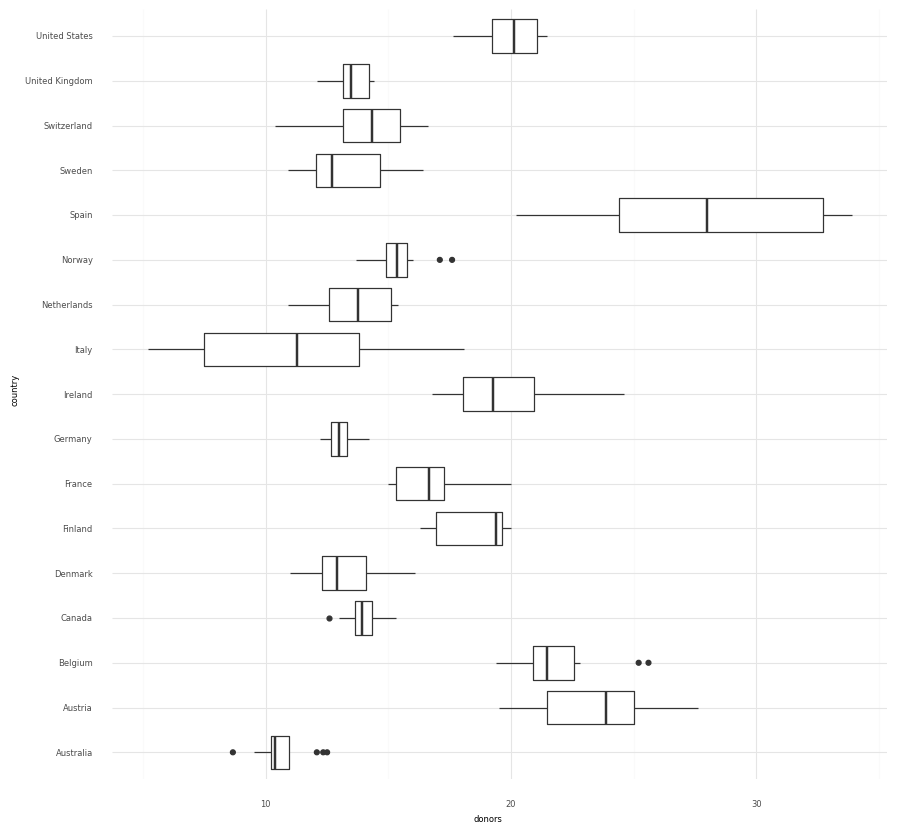

<ggplot: (325488354)>

In [9]:
# 5.7

plotnine.options.figure_size = (6, 6)

p1 + coord_flip()

In [10]:
organdata['country'] = organdata['country'].astype('category')

organdata['country'] = (organdata['country'].cat
                        .reorder_categories(
                            new_categories=organdata.groupby('country')['donors'].mean().sort_values(ascending=True).index.astype(str)
                        ))

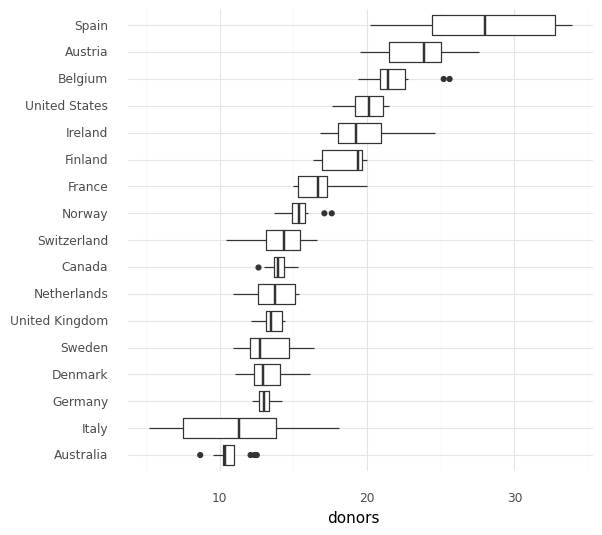

<ggplot: (327630605)>

In [11]:
# 5.8

p = ggplot(
    data = organdata,
    mapping=aes(x='country',y='donors')
)

p + geom_boxplot() + labs(x=None) + coord_flip() + theme_minimal()

In [12]:
organdata['world'] = organdata['world'].fillna('NA')
organdata['world'] = (organdata['world'].astype('category').cat
                      .reorder_categories(
                          new_categories=['Corporatist','Liberal','SocDem','NA'],
                          ordered=True
                      ))

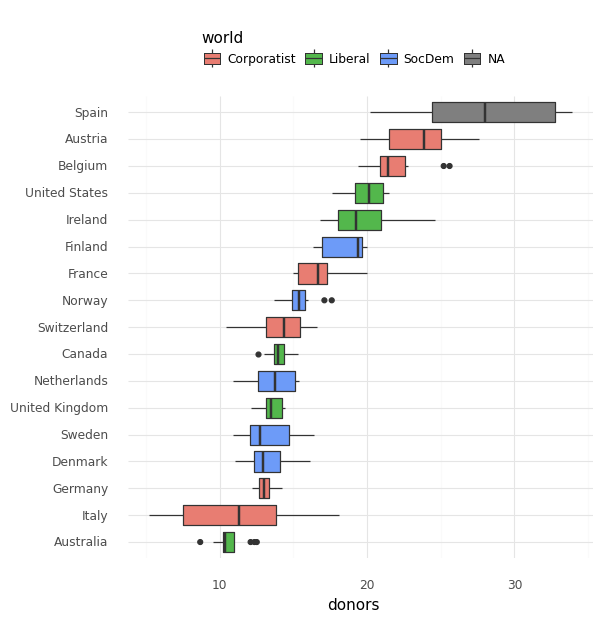

<ggplot: (327874780)>

In [13]:
# 5.9

p = ggplot(
    data = organdata,
    mapping=aes(x='country',y='donors', fill='world')
)

p + geom_boxplot() + \
    labs(x=None) + \
    coord_flip() + \
    theme_minimal() + \
    theme(legend_position='top') + \
    scale_fill_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )

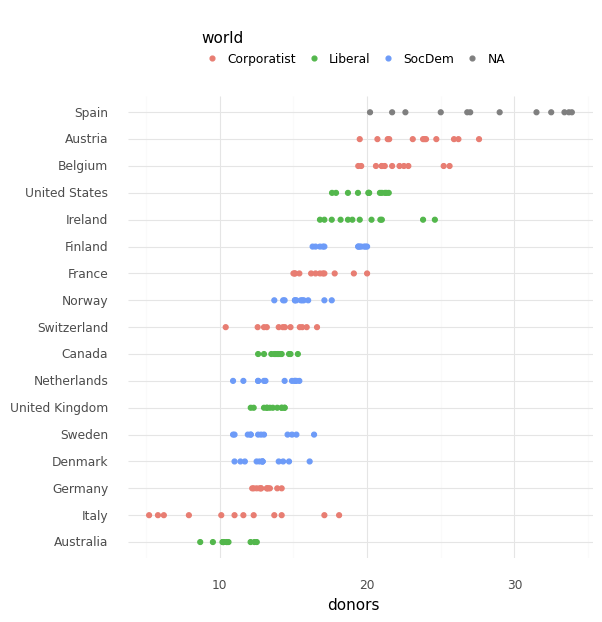

<ggplot: (328302951)>

In [14]:
# 5.10

p = ggplot(
    data=organdata,
    mapping=aes(x='country', y='donors',color='world')
)

p + geom_point() + \
    labs(x=None) + \
    coord_flip() + \
    theme_minimal() + \
    theme(legend_position='top') + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )

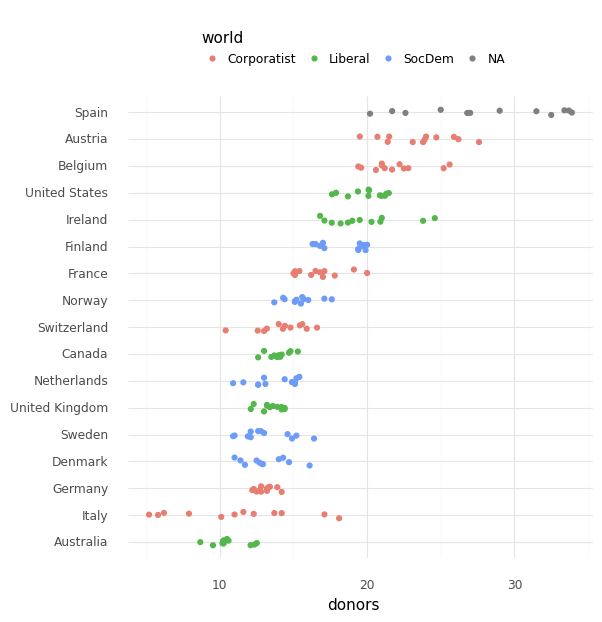

<ggplot: (328138147)>

In [15]:
# 5.12

p = ggplot(
    data=organdata,
    mapping=aes(x='country', y='donors',color='world')
)

p + geom_jitter(position=position_jitter(width=0.15)) + \
    labs(x=None) + \
    coord_flip() + \
    theme_minimal() + \
    theme(legend_position='top') + \
    scale_color_manual(
        ['#e87d72','#53b74c','#6d9bf8',GGGRAY]
    )